In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import geopandas as gpd

<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

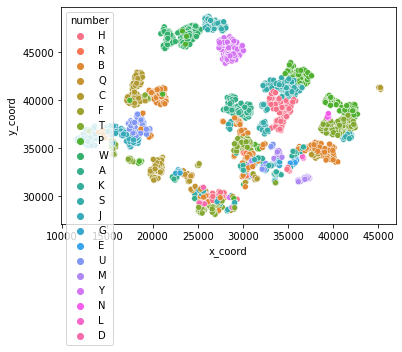

In [11]:
data = pd.read_csv('results/2021-01-01.csv')
g = data.groupby('time')
g = g.get_group((list(g.groups)[0]))
hdb = pd.read_csv('C:/Users/User/Documents/carpark datasets/hdb-carpark-information.csv')
df = pd.merge(g,hdb,left_on='number',right_on='car_park_no')
df['number'] = df['number'].str[0] 
sns.scatterplot(x="x_coord", y="y_coord",
              hue="number",
              data=df)

In [40]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
regions = gpd.read_file('regions.kml',driver='KML')
data = pd.read_csv('results/2021-01-01.csv')
g = data.groupby('time')
g = g.get_group((list(g.groups)[0]))
hdb = pd.read_csv('C:/Users/User/Documents/carpark datasets/hdb-carpark-information.csv')
df = pd.merge(g,hdb,left_on='number',right_on='car_park_no')


geometric_points = []
for xy in zip(df['x_coord'], df['y_coord']):
   geometric_points.append(Point(xy))
gl = gpd.GeoDataFrame(df, crs = {'init': 'epsg:3414'}, geometry = geometric_points)
gl = gl.to_crs(4326)
gl=pd.DataFrame(gl)

r = []

for i in range(0, len(gl)):
   point = gl.geometry.loc[i]
   r.append(regions[regions.contains(point).values]['Name'].iloc[0])

gl['region']=r
gl.drop(df.columns[range(1,17)],axis=1,inplace=True)


C:\Users\User\anaconda3\envs\virtualisation\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
gl.region.value_counts()

kml_104    72
kml_281    50
kml_215    45
kml_175    45
kml_318    43
           ..
kml_138     1
kml_127     1
kml_42      1
kml_224     1
kml_126     1
Name: region, Length: 151, dtype: int64

<BarContainer object of 24 artists>

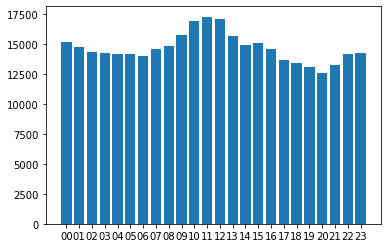

In [61]:
# gl.groupby('region').available.sum()
data = pd.read_csv('results/2021-01-02.csv')
data = data.merge(gl,on='number')
data
data.time=data.time.str[11:13]
a = data.groupby(['region','time']).available.sum()
plt.bar(a['kml_100'].index,a['kml_100'])

<BarContainer object of 24 artists>

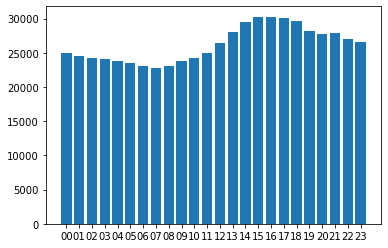

In [64]:
plt.bar(a['kml_103'].index,a['kml_103'])

In [222]:
import pandas as pd
import numpy as np
housing_num=pd.read_csv('Housing_Location.csv')
housing_num.drop(housing_num.columns[-1],axis=1,inplace=True)
housing_num.columns = housing_num.columns.str[1:-1]
housing_df=housing_num.select_dtypes('object')
housing_num[housing_df.columns]=housing_df.apply(lambda x: x.str.strip())

In [210]:
housing_num.iloc[range(0,27)]

,Variables,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total Residential Units,"700,453","727,950","787,481","820,410","843,299","860,544","866,071","874,183","876,985",...,"914,102","922,493","933,278","959,960","984,908","1,010,613","1,043,968","1,061,236","1,071,126","1,079,630"
1,Ang Mo Kio,"48,075","48,020","47,926","48,581","48,567","47,996","47,982","47,960","47,939",...,"49,865","48,920","48,915","49,169","49,168","49,450","50,733","50,728","50,726","51,312"
2,Bedok,"56,490","56,677","56,998","58,786","58,608","58,732","58,727","59,008","59,476",...,"59,199","59,199","59,205","59,822","61,218","61,100","61,640","62,156","62,513","63,031"
3,Bishan,"18,202","19,038","19,035","19,031","19,011","19,011","19,368","19,367","19,367",...,"20,023","20,023","19,665","19,665","19,664","19,664","20,072","20,072","20,072","20,072"
4,Bukit Batok,"27,871","30,127","31,037","31,032","31,029","31,026","31,425","32,294","33,336",...,"32,091","32,095","32,095","32,275","32,274","32,984","39,139","42,988","43,623","45,092"
5,Bukit Merah,"46,797","46,762","47,439","48,136","49,638","51,380","48,113","48,897","49,852",...,"52,962","52,309","51,185","51,885","51,554","52,401","53,880","55,110","54,269","54,227"
6,Bukit Panjang,"14,430","17,743","21,969","22,948","27,585","28,097","28,796","29,498","29,498",...,"30,207","30,681","31,305","34,239","35,325","35,325","35,325","35,325","35,325","35,325"
7,Bukit Timah,"2,427","2,427","2,425","2,425","2,424","2,424","2,424","2,424","2,423",...,"2,423","2,423","2,423","2,423","2,555","2,555","2,555","2,554","2,554","2,554"
8,Central Area,"14,284","13,964","13,285","13,199","13,524","12,085","11,525","10,754","10,752",...,"12,611","12,611","12,609","12,571","12,571","12,571","12,004","12,004","12,003","12,003"
9,Choa Chu Kang,"24,200","27,397","34,950","35,195","37,528","38,987","39,174","39,174","39,173",...,"39,984","40,383","41,257","41,577","44,374","48,900","48,900","48,900","48,900","49,026"


In [117]:
import geopandas as gpd
regions = gpd.read_file('regions.geojson')
ind = regions.Description.str.find('PLN_AREA_C')
for i in range(0,332):
    regions.Description.loc[i] = regions.Description[i][ind[i]+20:ind[i]+22]
regions.rename(columns={'Description':'Area'},inplace=True)

C:\Users\User\anaconda3\envs\virtualisation\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [242]:
data = pd.read_csv('C:/Users/User/Documents/carpark datasets/output_2019/2019-01-01.csv')
g = data.groupby('time')
g = g.get_group((list(g.groups)[0]))
hdb = pd.read_csv('C:/Users/User/Documents/carpark datasets/hdb-carpark-information.csv')
df = pd.merge(g,hdb,left_on='number',right_on='car_park_no')


geometric_points = []
for xy in zip(df['x_coord'], df['y_coord']):
   geometric_points.append(Point(xy))
gl = gpd.GeoDataFrame(df, crs = {'init': 'epsg:3414'}, geometry = geometric_points)
gl = gl.to_crs(4326)
gl=pd.DataFrame(gl)

r = []

for i in range(0, len(gl)):
   point = gl.geometry.loc[i]
   r.append(regions[regions.contains(point).values]['Area'].iloc[0])

gl['region']=r
# gl.drop(df.columns[range(2,17)],axis=1,inplace=True)
gl.drop(df.columns[0],axis=1,inplace=True)
gl


In [127]:
gl

,number,geometry,region
0,HE12,POINT (103.81865 1.28821),BM
1,HLM,POINT (103.84549 1.28476),OT
2,RHM,POINT (103.81858 1.28646),BM
3,BM29,POINT (103.81710 1.28363),BM
4,Q81,POINT (103.79316 1.30754),QT
...,...,...,...
1882,PL78,POINT (103.89750 1.41122),PG
1883,PL77,POINT (103.91955 1.40101),PG
1884,TJ41,POINT (103.72340 1.32681),JW
1885,J49M,POINT (103.71968 1.35378),JW


In [131]:
gl.region.unique()

array(['BM', 'OT', 'QT', 'CL', 'BT', 'JE', 'HG', 'PR', 'TM', 'BD', 'RC',
       'AM', 'BS', 'SG', 'KL', 'JW', 'BK', 'NV', 'GL', 'MP', 'TP', 'YS',
       'BP', 'WD', 'PG', 'CK', 'TN', 'SE', 'SB', 'CH', 'DT'], dtype=object)

In [227]:
def classify(row):
    if row.region=='BM':return 'Bukit Merah'
    elif row.region=='OT':return 'Outram'
    elif row.region=='QT':return 'Queenstown'
    elif row.region=='CL':return 'Clementi'
    elif row.region=='BT':return 'Bukit Timah'
    elif row.region=='JE':return 'Jurong East'
    elif row.region=='JW':return 'Jurong West'
    elif row.region=='HG':return 'Hougang'
    elif row.region=='PR':return 'Pasir Ris'
    elif row.region=='TM':return 'Tampines'
    elif row.region=='BD':return 'Bedok'
    elif row.region=='RC':return 'Rochor'
    elif row.region=='AM':return 'Ang Mo Kio'
    elif row.region=='BS':return 'Bishan'
    elif row.region=='SG':return 'Serangoon'
    elif row.region=='KL':return 'Kallang/Whampoa'
    elif row.region=='BK':return 'Bukit Batok'
    elif row.region=='NV':return 'Novena'
    elif row.region=='GL':return 'Geylang'
    elif row.region=='MP':return 'Marine Parade'
    elif row.region=='TP':return 'Toa Payoh'
    elif row.region=='YS':return 'Yishun'
    elif row.region=='BP':return 'Bukit Panjang'
    elif row.region=='WD':return 'Woodlands'
    elif row.region=='PG':return 'Punggol'
    elif row.region=='CK':return 'Choa Chu Kang'
    elif row.region=='TN':return 'Tanglin'
    elif row.region=='SE':return 'Sengkang'
    elif row.region=='SB':return 'Sembawang'
    elif row.region=='CH':return 'Changi'
    elif row.region=='DT':return 'Downtown Core'

gl['area']=gl.apply(classify,axis='columns')

In [228]:
gl

,number,geometry,region,area
0,HE12,POINT (103.81865 1.28821),BM,Bukit Merah
1,HLM,POINT (103.84549 1.28476),OT,Outram
2,RHM,POINT (103.81858 1.28646),BM,Bukit Merah
3,BM29,POINT (103.81710 1.28363),BM,Bukit Merah
4,Q81,POINT (103.79316 1.30754),QT,Queenstown
...,...,...,...,...
1882,PL78,POINT (103.89750 1.41122),PG,Punggol
1883,PL77,POINT (103.91955 1.40101),PG,Punggol
1884,TJ41,POINT (103.72340 1.32681),JW,Jurong West
1885,J49M,POINT (103.71968 1.35378),JW,Jurong West


In [235]:
df=gl.merge(housing_num.iloc[0:27],left_on='area',right_on='Variables',how='left')

In [236]:
df

,number,geometry,region,area,Variables,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,HE12,POINT (103.81865 1.28821),BM,Bukit Merah,Bukit Merah,"46,797","46,762","47,439","48,136","49,638",...,"52,962","52,309","51,185","51,885","51,554","52,401","53,880","55,110","54,269","54,227"
1,HLM,POINT (103.84549 1.28476),OT,Outram,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RHM,POINT (103.81858 1.28646),BM,Bukit Merah,Bukit Merah,"46,797","46,762","47,439","48,136","49,638",...,"52,962","52,309","51,185","51,885","51,554","52,401","53,880","55,110","54,269","54,227"
3,BM29,POINT (103.81710 1.28363),BM,Bukit Merah,Bukit Merah,"46,797","46,762","47,439","48,136","49,638",...,"52,962","52,309","51,185","51,885","51,554","52,401","53,880","55,110","54,269","54,227"
4,Q81,POINT (103.79316 1.30754),QT,Queenstown,Queenstown,"29,002","28,962","29,346","29,376","28,656",...,"30,756","29,904","30,494","29,990","31,504","31,504","32,679","32,676","33,164","33,973"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,PL78,POINT (103.89750 1.41122),PG,Punggol,Punggol,na,na,na,na,460,...,"24,495","27,792","30,166","32,890","39,981","42,984","48,813","49,909","49,909","51,704"
1883,PL77,POINT (103.91955 1.40101),PG,Punggol,Punggol,na,na,na,na,460,...,"24,495","27,792","30,166","32,890","39,981","42,984","48,813","49,909","49,909","51,704"
1884,TJ41,POINT (103.72340 1.32681),JW,Jurong West,Jurong West,"46,918","48,691","54,649","61,040","66,712",...,"68,656","69,103","69,696","71,755","71,755","72,719","74,301","75,208","75,208","75,207"
1885,J49M,POINT (103.71968 1.35378),JW,Jurong West,Jurong West,"46,918","48,691","54,649","61,040","66,712",...,"68,656","69,103","69,696","71,755","71,755","72,719","74,301","75,208","75,208","75,207"
